In [100]:
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,normalize
from sklearn import datasets,linear_model,metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage,dendrogram

In [101]:
data=pd.read_csv("C:/Users/sudarson.SUDARSON/Downloads/College_Data.txt")

In [102]:
data=data.rename(columns={'Unnamed: 0':'university',"F.Undergrad":"Fulltime","P.Undergrad":"Parttime","Grad.Rate":"GradeRate","Room.Board":"RoomBoard","S.F.Ratio":"SF_Rate","perc.alumni":"perAlumni"})

In [103]:
name=data.university

In [104]:
#data=data.iloc[0:10,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15,16,17,18]]
data=data.iloc[0:10,2:]

In [105]:
data.shape

(10, 17)

In [106]:
data.isnull().sum()

Apps         0
Accept       0
Enroll       0
Top10perc    0
Top25perc    0
Fulltime     0
Parttime     0
Outstate     0
RoomBoard    0
Books        0
Personal     0
PhD          0
Terminal     0
SF_Rate      0
perAlumni    0
Expend       0
GradeRate    0
dtype: int64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apps       10 non-null     int64  
 1   Accept     10 non-null     int64  
 2   Enroll     10 non-null     int64  
 3   Top10perc  10 non-null     int64  
 4   Top25perc  10 non-null     int64  
 5   Fulltime   10 non-null     int64  
 6   Parttime   10 non-null     int64  
 7   Outstate   10 non-null     int64  
 8   RoomBoard  10 non-null     int64  
 9   Books      10 non-null     int64  
 10  Personal   10 non-null     int64  
 11  PhD        10 non-null     int64  
 12  Terminal   10 non-null     int64  
 13  SF_Rate    10 non-null     float64
 14  perAlumni  10 non-null     int64  
 15  Expend     10 non-null     int64  
 16  GradeRate  10 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 1.5 KB


In [108]:
data.GradeRate[data.GradeRate>100]=100

C:\Users\SUDARS~1.SUD\AppData\Local\Temp/ipykernel_13512/3818518919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.GradeRate[data.GradeRate>100]=100


In [109]:
data.GradeRate[data.GradeRate==100]

Series([], Name: GradeRate, dtype: int64)

In [110]:
data[data.GradeRate==100]

,Apps,Accept,Enroll,Top10perc,Top25perc,Fulltime,Parttime,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SF_Rate,perAlumni,Expend,GradeRate


In [111]:
data["Totalexp"]=data.Expend/data.Outstate

In [112]:
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,Fulltime,Parttime,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SF_Rate,perAlumni,Expend,GradeRate,Totalexp
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.946371
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.857248
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.776444
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1.467284
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1.444709


In [113]:
s=data.Totalexp.unique().max()

In [114]:
data[data.Totalexp==s]

,Apps,Accept,Enroll,Top10perc,Top25perc,Fulltime,Parttime,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SF_Rate,perAlumni,Expend,GradeRate,Totalexp
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1.467284


<h1>CLUSTURING<H1>

In [115]:
data1=data.iloc[0:,2:]

In [116]:
data1.head()

,Enroll,Top10perc,Top25perc,Fulltime,Parttime,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SF_Rate,perAlumni,Expend,GradeRate,Totalexp
0,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.946371
1,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.857248
2,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.776444
3,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1.467284
4,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1.444709


In [117]:
scaled=normalize(data1,axis=1)

In [118]:
scaled

array([[6.32330851e-02, 2.01714418e-03, 4.56049989e-03, 2.53020042e-01,
        4.70959316e-02, 6.52502293e-01, 2.89416339e-01, 3.94658645e-02,
        1.92944226e-01, 6.13913447e-03, 6.84074984e-03, 1.58740477e-03,
        1.05242305e-03, 6.17509226e-01, 5.26211526e-03, 8.29985519e-05],
       [2.88477638e-02, 9.01492619e-04, 1.63395537e-03, 1.51169044e-01,
        6.91332152e-02, 6.91895585e-01, 3.63414212e-01, 4.22574665e-02,
        8.45149331e-02, 1.63395537e-03, 1.69029866e-03, 6.87388122e-04,
        9.01492619e-04, 5.93125800e-01, 3.15522417e-03, 4.83001466e-05],
       [2.26710235e-02, 1.48441226e-03, 3.37366422e-03, 6.99023226e-02,
        6.67985515e-03, 7.59074449e-01, 2.53024816e-01, 2.69893137e-02,
        7.86063763e-02, 3.57608407e-03, 4.45323677e-03, 8.70405368e-04,
        2.02419853e-03, 5.89379139e-01, 3.64355736e-03, 5.23892568e-05],
       [5.78642642e-03, 2.53420135e-03, 3.75906534e-03, 2.15407115e-02,
        2.66091142e-03, 5.47387492e-01, 2.30189956e-01, 1.900

In [119]:
data2=pd.DataFrame(scaled)

In [120]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.063233,0.002017,0.004560,0.253020,0.047096,0.652502,0.289416,0.039466,0.192944,0.006139,0.006841,0.001587,0.001052,0.617509,0.005262,0.000083
1,0.028848,0.000901,0.001634,0.151169,0.069133,0.691896,0.363414,0.042257,0.084515,0.001634,0.001690,0.000687,0.000901,0.593126,0.003155,0.000048
2,0.022671,0.001484,0.003374,0.069902,0.006680,0.759074,0.253025,0.026989,0.078606,0.003576,0.004453,0.000870,0.002024,0.589379,0.003644,0.000052
3,0.005786,0.002534,0.003759,0.021541,0.002661,0.547387,0.230190,0.019007,0.036957,0.003886,0.004097,0.000325,0.001563,0.803173,0.002492,0.000062
4,0.003917,0.001140,0.003134,0.017734,0.061891,0.538434,0.293432,0.056977,0.106832,0.005413,0.005128,0.000848,0.000142,0.777880,0.001068,0.000103
5,0.009291,0.002235,0.003646,0.039869,0.002411,0.793847,0.196110,0.029402,0.039692,0.003940,0.004293,0.000553,0.000647,0.571982,0.003234,0.000042
6,0.006042,0.000997,0.002640,0.024402,0.013492,0.779582,0.335531,0.029330,0.087989,0.005279,0.005455,0.000675,0.001525,0.519780,0.003696,0.000039
7,0.026090,0.001974,0.003628,0.085045,0.001707,0.739903,0.257483,0.024009,0.045350,0.004748,0.005335,0.000731,0.001974,0.612869,0.003895,0.000044
8,0.011356,0.001501,0.003152,0.048674,0.015308,0.780136,0.220109,0.015007,0.025012,0.003952,0.004202,0.000565,0.001151,0.582488,0.004002,0.000037
9,0.011978,0.001462,0.003064,0.055642,0.005432,0.728987,0.235382,0.045962,0.125351,0.002786,0.002855,0.000801,0.001045,0.626129,0.003621,0.000060


In [121]:
temp =hierarchy.linkage(data2)

In [122]:
temp

array([[ 5.        ,  8.        ,  0.03932941,  2.        ],
       [ 2.        ,  7.        ,  0.04819023,  2.        ],
       [10.        , 11.        ,  0.07242078,  4.        ],
       [ 9.        , 12.        ,  0.07372686,  5.        ],
       [ 6.        , 13.        ,  0.12067962,  6.        ],
       [ 3.        ,  4.        ,  0.12074784,  2.        ],
       [ 1.        , 14.        ,  0.15728604,  7.        ],
       [ 0.        , 16.        ,  0.17745506,  8.        ],
       [15.        , 17.        ,  0.26054197, 10.        ]])

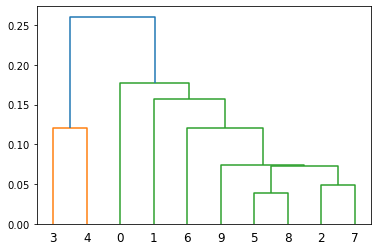

In [123]:
dn = hierarchy.dendrogram(temp)

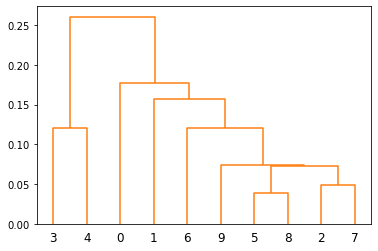

In [124]:
dn = hierarchy.dendrogram(temp, above_threshold_color="green", color_threshold=.7)

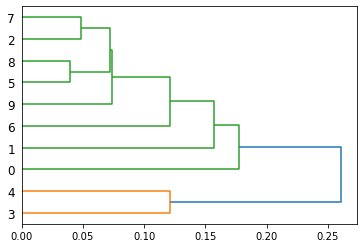

In [125]:
dn = hierarchy.dendrogram(temp,orientation='right')

<h1>agglomereativeClustering<h1>

In [126]:
clustering = AgglomerativeClustering(n_clusters=3).fit_predict(scaled)

In [127]:
clustering

array([2, 2, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [128]:
#clustering.labels_

In [129]:
data["aggclus"]=clustering

In [130]:
data.aggclus

0    2
1    2
2    0
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: aggclus, dtype: int64

In [131]:
data["university"]=name
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,Fulltime,Parttime,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SF_Rate,perAlumni,Expend,GradeRate,Totalexp,aggclus,university
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.946371,2,Abilene Christian University
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.857248,2,Adelphi University
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.776444,0,Adrian College
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1.467284,1,Agnes Scott College
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1.444709,1,Alaska Pacific University


In [135]:
data=data.iloc[0:,[19,18,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,]]

In [136]:
data

,university,aggclus,Apps,Accept,Enroll,Top10perc,Top25perc,Fulltime,Parttime,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SF_Rate,perAlumni,Expend,GradeRate,Totalexp
0,Abilene Christian University,2,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.946371
1,Adelphi University,2,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.857248
2,Adrian College,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.776444
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1.467284
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1.444709
5,Albertson College,0,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,0.720519
6,Albertus Magnus College,0,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,0.666742
7,Albion College,0,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,0.828310
8,Albright College,0,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,0.746650
9,Alderson-Broaddus College,0,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,0.858903


In [158]:
CSV = data.to_csv("Downloads\CSV.txt")

In [157]:
Excel = data.to_excel("Downloads\Excel.xls")

C:\Users\SUDARS~1.SUD\AppData\Local\Temp/ipykernel_13512/274321961.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  Excel = data.to_excel("Downloads\Excel.xls")


In [150]:
data.to_excel("C:/Users/sudarson.SUDARSON/Downloads/College_Data.xls")

C:\Users\SUDARS~1.SUD\AppData\Local\Temp/ipykernel_13512/3095478561.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel("C:/Users/sudarson.SUDARSON/Downloads/College_Data.xls")
